# numpy

This library provides a convenient set of functions in order to process n-dimensional array data. The functions included in this package can deal with single numbers, arrays, matrices and much more.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Multidimensional array

The main data structure in numpy is the homogenous multidimensional array. Let's break down the name:

- Homogenous: All the data in the array is of the same type
- Array: Data can be stored and accessed in arrays
- Multidimensional: Arrays of data can be nested in as many levels as needed

This data structure is indexed by a tuple of non-negative integers indicating the coordinates in each dimension (or `axis` in numpy terminology).


In [2]:
points_3d = np.array([
  [1, 2, 1],
  [0, 2, 3]
])

def describe_ndarray(ndarr):
  print(f'Type: {type(ndarr)}')
  print(f'Dimensions: {ndarr.ndim}')
  print(f'Size: {ndarr.size}')
  print(f'Shape: {ndarr.shape}')
  print(f'Type: {ndarr.dtype.name}')
  print(f'Item size: {ndarr.itemsize}')
  print()

describe_ndarray(points_3d)

Type: <class 'numpy.ndarray'>
Dimensions: 2
Size: 6
Shape: (2, 3)
Type: int64
Item size: 8



These are the basic attibutes of a multidimensional array, from the [docs](https://numpy.org/devdocs/user/quickstart.html):


- ndarray.ndim: the number of axes (dimensions) of the array.

- ndarray.shape: the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the number of axes, ndim.

- ndarray.size: the total number of elements of the array. This is equal to the product of the elements of shape.

- ndarray.dtype: an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

- ndarray.itemsize: the size in bytes of each element of the array. For example, an array of elements of type float64 has itemsize 8 (=64/8), while one of type complex32 has itemsize 4 (=32/8). It is equivalent to ndarray.dtype.itemsize.

- ndarray.data: the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access the elements in an array using indexing facilities.



## Initialization

A numpy ndarray can be created in a variety of ways:

`array` function:

In [3]:
arr = np.array([1, 2, 3])
print('An array:\n', arr)
describe_ndarray(arr)

mat = np.array([[1, 2, 3], [4, 5, 6]])
print('A matrix:\n', mat)
describe_ndarray(mat)

array_of_list = np.array([[1, 2, 3], [4, 5, 6, 7, 8]])
print('A array of list:\n', array_of_list)
describe_ndarray(array_of_list)

An array:
 [1 2 3]
Type: <class 'numpy.ndarray'>
Dimensions: 1
Size: 3
Shape: (3,)
Type: int64
Item size: 8

A matrix:
 [[1 2 3]
 [4 5 6]]
Type: <class 'numpy.ndarray'>
Dimensions: 2
Size: 6
Shape: (2, 3)
Type: int64
Item size: 8

A array of list:
 [list([1, 2, 3]) list([4, 5, 6, 7, 8])]
Type: <class 'numpy.ndarray'>
Dimensions: 1
Size: 2
Shape: (2,)
Type: object
Item size: 8



Using `zeros`, `ones` and `empty` functions you can create an array with placeholder values, this is useful for when the shape is known.

In [4]:
zeros = np.zeros((2, 3))
print("Zeros:\n", zeros)

ones = np.ones((2, 3))
print("Ones:\n", ones)

in_memory = np.empty((2, 3))
print("In memory values:\n", in_memory)

Zeros:
 [[0. 0. 0.]
 [0. 0. 0.]]
Ones:
 [[1. 1. 1.]
 [1. 1. 1.]]
In memory values:
 [[1. 1. 1.]
 [1. 1. 1.]]


For ranges of numbers, `arange` can be used.

In [5]:
ara0 = np.arange(10)
print(ara0)

ara1 = np.arange(2, 6) # start and stop
print(ara1)

ara2 = np.arange(3, 7, 0.33) # start, stop and step (can be decimal)
print(ara2)

[0 1 2 3 4 5 6 7 8 9]
[2 3 4 5]
[3.   3.33 3.66 3.99 4.32 4.65 4.98 5.31 5.64 5.97 6.3  6.63 6.96]


In order to obtain ranges for certain evenly spaced distributions we can use:

- `linspace`: linear distribution
- `logspace`: logarithmic distribution

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ]


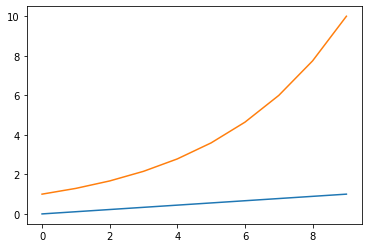

In [6]:
lin = np.linspace(0, 1, 10)
print(lin)
plt.plot(lin)

log = np.logspace(0, 1, 10)
print(log)
_ = plt.plot(log)

We can also generate other distributions with random numbers.

[ 0.95256263 -0.10512118 -1.24744739 ... -0.6474109  -0.84096793
 -0.44989368]


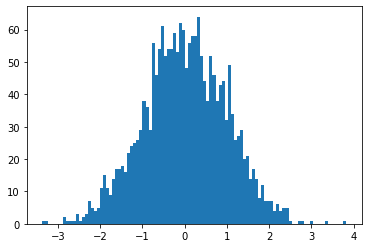

In [7]:
norm = np.random.normal(size = 2000)
print(norm)
_ = plt.hist(norm, bins=100)

[0.17239337 0.33758786 0.96702299 ... 0.52254256 0.23333787 0.31128568]


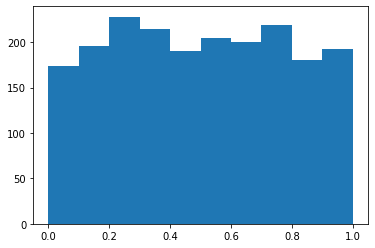

In [8]:
unif = np.random.uniform(size=2000, )
print(unif)
_ = plt.hist(unif)

ndarrays can also be created by using `reshape` on another `ndarray`.

In [9]:
arr = np.linspace(0, 1, 12)
print(arr)

reshaped0 = arr.reshape((3,4))
print(reshaped0)

reshaped1 = arr.reshape((6,-1)) # calculate other dimension automatically
print(reshaped1)

[0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
[[0.         0.09090909 0.18181818 0.27272727]
 [0.36363636 0.45454545 0.54545455 0.63636364]
 [0.72727273 0.81818182 0.90909091 1.        ]]
[[0.         0.09090909]
 [0.18181818 0.27272727]
 [0.36363636 0.45454545]
 [0.54545455 0.63636364]
 [0.72727273 0.81818182]
 [0.90909091 1.        ]]


Similarly, an array can be flattened with `ravel`.

In [10]:
arr = np.array([
  [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9]
])
print(arr)

flat = arr.ravel()
print(flat)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]


The transpose can also be computed with `T`.

In [11]:
arr = np.array([
  [1, 1, 1, 1],
  [2, 2, 2, 2],
  [3, 3, 3, 3]
])
print(arr)

transpose = arr.T
print(transpose)

[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]


## Access

In order to access ndarrays we can make use of slicing like in normal python lists.

In [12]:
X = np.arange(16).reshape((4, 4))
print(X)
print()

print('Single value\n', X[1,1]) # single number
print('Clone \n', X[:,:]) # clone matrix
print('Rows\n', X[1:3,:]) # row access
print('Columns\n', X[:,1:3]) # column access
print('Both\n', X[1:3,1:3]) # both access

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

Single value
 5
Clone 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
Rows
 [[ 4  5  6  7]
 [ 8  9 10 11]]
Columns
 [[ 1  2]
 [ 5  6]
 [ 9 10]
 [13 14]]
Both
 [[ 5  6]
 [ 9 10]]


This can also be done with higher dimensional ndarrays.

In [13]:
A = np.arange(4**3).reshape((4, 4, 4))
print(A)

print(A[1:3,1:3,1:3])

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]

 [[48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]
  [60 61 62 63]]]
[[[21 22]
  [25 26]]

 [[37 38]
  [41 42]]]


## Operations

Arithmetic operations such as sums and products can be performed with the numeric binary operators for element-wise operations.

In [15]:
a = np.arange(5)
b = np.arange(5, 10)

print(a)
print(b)
print()

print('Sum', a + b)
print('Product', a * b)
print('Difference', a - b)
print('Division', a / b)
print('Product', b ** a)

[0 1 2 3 4]
[5 6 7 8 9]

Sum [ 5  7  9 11 13]
Product [ 0  6 14 24 36]
Difference [-5 -5 -5 -5 -5]
Division [0.         0.16666667 0.28571429 0.375      0.44444444]
Product [   1    6   49  512 6561]


These operations can also be done with singe elements.

In [14]:
a = np.arange(5)

print(a)
print()

print('Sum', a + 10)
print('Product', a * 10)
print('Difference', a - 5)
print('Division', a / 2)
print('Product', a ** 2)
print('Comparison', a > 2)

[0 1 2 3 4]

Sum [10 11 12 13 14]
Product [ 0 10 20 30 40]
Difference [-5 -4 -3 -2 -1]
Division [0.  0.5 1.  1.5 2. ]
Product [ 0  1  4  9 16]
Comparison [False False False  True  True]


In matrices you can compute the matrix product using `@`.

In [16]:
A = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])

B = np.array([
  [2],
  [2]
])

print('Matrix product', A @ B)
print('Element product', A * A) # element wise

Matrix product [[ 6]
 [14]
 [22]]
Element product [[ 1  4]
 [ 9 16]
 [25 36]]


Unary operations can be performed as well.

In [17]:
ndarr = np.random.normal(size=18).reshape((3, 3, 2))
print(ndarr)

print('Max', ndarr.max())
print('Min', ndarr.min())
print('Mean', ndarr.mean())
print('Sum', ndarr.sum())

[[[ 0.09409399 -0.59249332]
  [ 0.13742033 -1.94847819]
  [-0.48570002  0.379159  ]]

 [[ 0.52187673 -1.01987854]
  [-2.20943767  0.68461682]
  [ 0.08739543 -1.90713573]]

 [[ 1.9170355  -0.20593687]
  [ 1.33264519  1.99285775]
  [ 0.93047608  0.19487571]]]
Max 1.9928577501787215
Min -2.209437669960081
Mean -0.005367099450190103
Sum -0.09660779010342185


These operations can be used along with the `axis` parameter in order to obtain results per dimension (axis).

In [18]:
ndarr = np.array([
  [1, 5, 2],
  [9, 3, 5],
  [4, 6, 0]
])
print(ndarr)

print('Max all', ndarr.max()) # max of all values
print('Max 0', ndarr.max(axis=0)) # max of each column
print('Max 1', ndarr.max(axis=1)) # max of each row

[[1 5 2]
 [9 3 5]
 [4 6 0]]
Max all 9
Max 0 [9 6 5]
Max 1 [5 9 6]


# Exercise

Implement Strassens algorithm for matrix multiplication usling only numpy. The algorithm definition can be found in [Wikipedia](https://en.wikipedia.org/wiki/Strassen_algorithm).

Below is some boilerplate to get started.

In [19]:
def strassen(A, B):  
  n = len(A)

  if n == 2:
    return A @ B

  h = n//2

  A11 = # slice matrices
  A12 = # slice matrices
  A21 = # slice matrices
  A22 = # slice matrices
  B11 = # slice matrices
  B12 = # slice matrices
  B21 = # slice matrices
  B22 = # slice matrices
  
  M1 = # recursive call
  M2 = # recursive call
  M3 = # recursive call
  M4 = # recursive call
  M5 = # recursive call
  M6 = # recursive call
  M7 = # recursive call
  
  C = np.zeros((n,n))
  # assign C

  return C

SyntaxError: invalid syntax (<ipython-input-19-4bc313c0973c>, line 9)

In [ ]:
A = np.array([
  [1, 2, 5, 5],
  [3, 4, 9, 1],
  [0, 2, 1, 0],
  [4, 2, 7, 6],
])

B = np.array([
  [4, 2, 8, 2],
  [4, 4, 7, 6],
  [3, 3, 9, 1],
  [3, 4, 9, 2]
])

normal_mul = A @ B
strassen_mul = strassen(A, B)

print(normal_mul)
print(strassen_mul)
print((normal_mul == strassen_mul).all())

In [ ]:
(5.0).is_integer()